### Video Game Sales

As early as computers were being built, the creation of games on the computer soon followed. With the rapid popularity and interest of video games, the video game industry became a massive development. From 2D computer games to arcade machines to consoles and handheld gaming devices, the billion-dollar tech enterprise allows users to play and experience any immersive world of their choice. With over 50 years since the beginning of video games, we have seen multiple big named titles in every genre and some of us have personally played a few, but what factors play into the highly profitable and enjoyable games? 

This is what I aim to answer in my data dive, how do different factors such as platform, publisher, genre, and regional sales of video games? By answering this research question, it can help with marketing strategies and where to aim our audience interest and which companies to partner with. It can also predict future sales by recognizing patterns and trends in the sales.

The dataset I will be using is based off video game sales up until 2020. It gives information on different big titled games, their genres, the year they were released, the platform they were released on, the publishers, the total regional sales, and the total global sales. It was generated by a scrape of vgchartz.com. 




I will be importing all the libraries I will need to dive into my dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('vgsales.csv')
df_2 = pd.read_csv('vgsales-12-4-2019.csv')
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In this dataset, we have 11 columns in totaL. which we will be using for our research question. Below I have provided a table with a small description of what each variable represents in the dataset.


| Column Name      | Description |
| ----------- | ----------- |
| Dataset      |   https://www.kaggle.com/datasets/gregorut/videogamesales     |
| Rank   | Ranking of overall sales        |
| Name      | Name of the game       |
| Platform   | Platform of the game (PC, PS4, Xbox, etc.)      |
| Year      | Year of the game release       |
| Genre   | Genre of the game        |
| Publisher      | Publisher of the game       |
| NA_Sales   | Sales in North America (in millions)    |
| EU_Sales      | Sales in Europe (in millions)       |
| JP_Sales   | Sales in Japan (in millions)       |
| Other_Sales      | Sales in the rest of the world (in millions)   |
| Global_Sales   | Total worldwide sales (in millions)        |


For my data dive, I will be using the following for my dependent and independent variables.

***Dependent Variable***
- Global_Sales

***Independent Variables***
- Platform
- Genre
- Publisher
- NA_Sales
- EU_Sales
- JP_Sales
- Other_Sales

In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Looking at our descriptive analysis, we can see that we have a total of 16,598 games in the dataset. The mean of the sales across the regions are very different with NA_Sales at about $0.264 million, EU_Sales at $0.147 million, JP_Sales at $0.078 million, Other_Sales at $0.048 million, and Global_Sales at 0.537 million. The standard deviations are also very different which shows us that there is variability in the sales data.

Text(0.5, 1.0, 'Missing values heatmap')

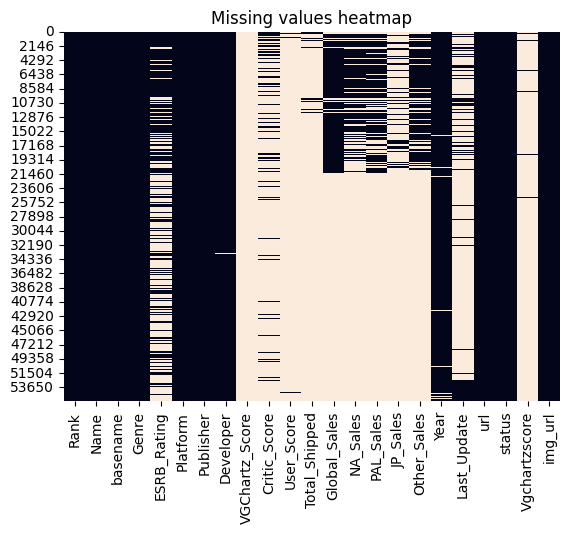

In [4]:
df_2 = pd.concat([df_2], ignore_index=True, sort =False)
df_2.isnull().sum()
sns.heatmap(df_2.isnull(), cbar = False).set_title('Missing values heatmap')

Text(0.5, 1.0, 'Missing values heatmap')

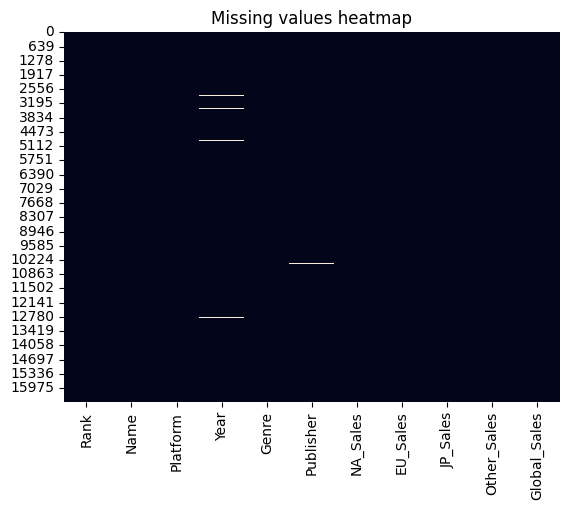

In [5]:
df = pd.concat([df], ignore_index=True, sort =False)
df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title('Missing values heatmap')

I was originally going to use the other dataset, 'vgsales-12-4-2019.csv', but after running the heatmap for missing values that is attached above, the amount of missing values will cause many issues in both my descriptive and predictive analysis. So from now on the only dataset I will be analyzing is the 'vgsales.csv' dataset.

In [6]:
(df['Publisher']).describe()

count               16540
unique                578
top       Electronic Arts
freq                 1351
Name: Publisher, dtype: object

In [7]:
(df['Name']).describe()

count                           16598
unique                          11493
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object

In [8]:
(df['Platform']).describe()

count     16598
unique       31
top          DS
freq       2163
Name: Platform, dtype: object

In [9]:
(df['Genre']).describe()

count      16598
unique        12
top       Action
freq        3316
Name: Genre, dtype: object

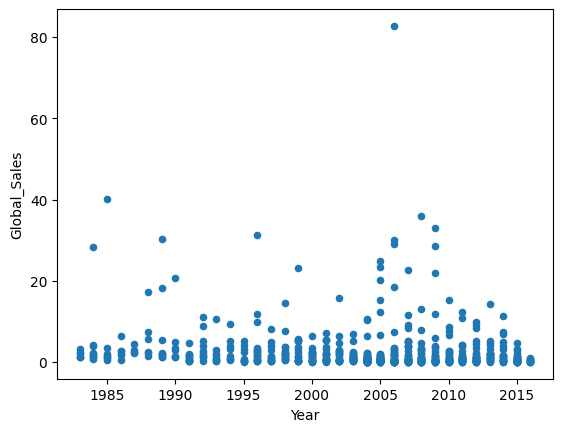

In [10]:
nintendo = "Publisher == 'Nintendo'"
smaller_df = df.query(nintendo)
smaller_df.plot.scatter(x='Year',y='Global_Sales')
plt.show()

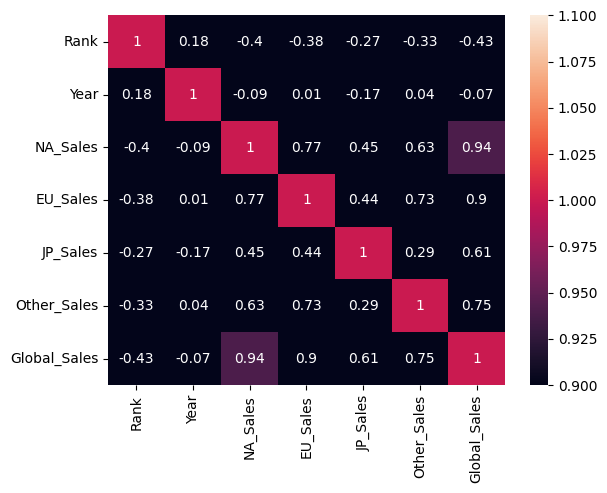

In [11]:
corr_matrix = df.corr(numeric_only=True).round(2)
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=1)
plt.show()